<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None

Analysis of Pclass vs Survival:

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


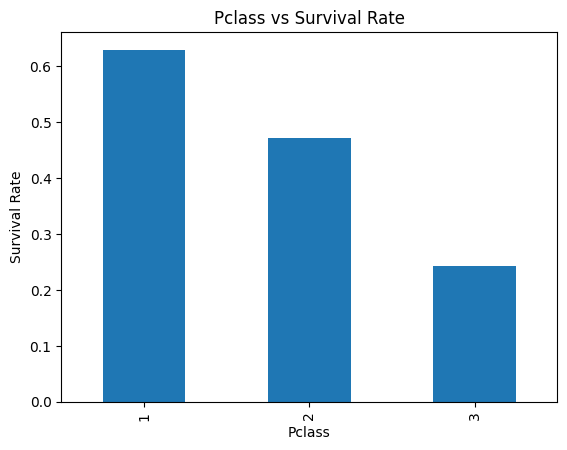


Analysis of Sex vs Survival:

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


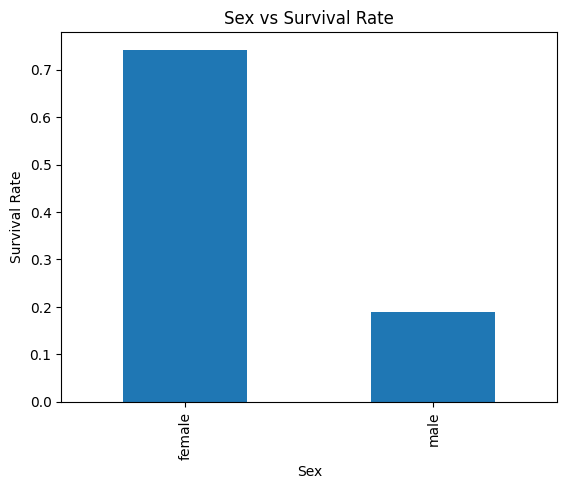


Analysis of Age vs Survival:



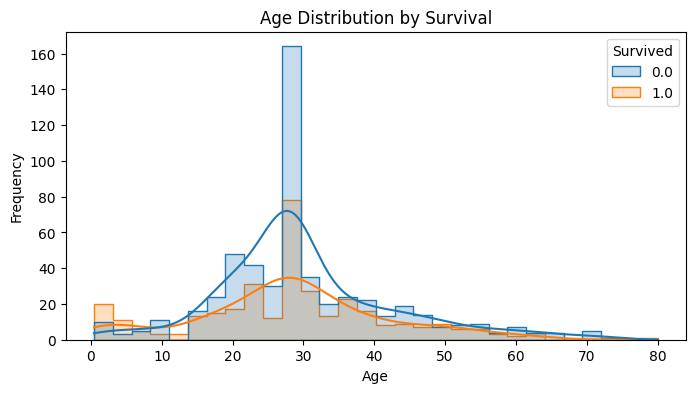

              Age  Survived
Age       1.00000  -0.06491
Survived -0.06491   1.00000

Analysis of SibSp vs Survival:

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


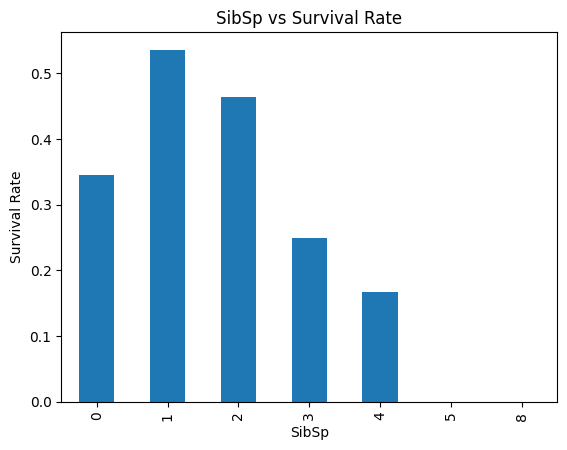


Analysis of Parch vs Survival:

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
9         NaN
Name: Survived, dtype: float64


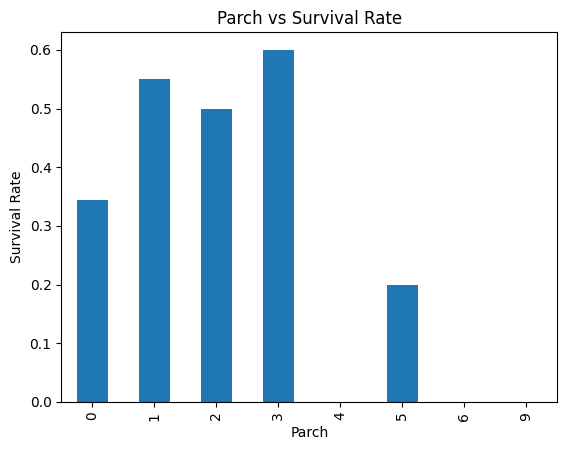


Analysis of Fare vs Survival:



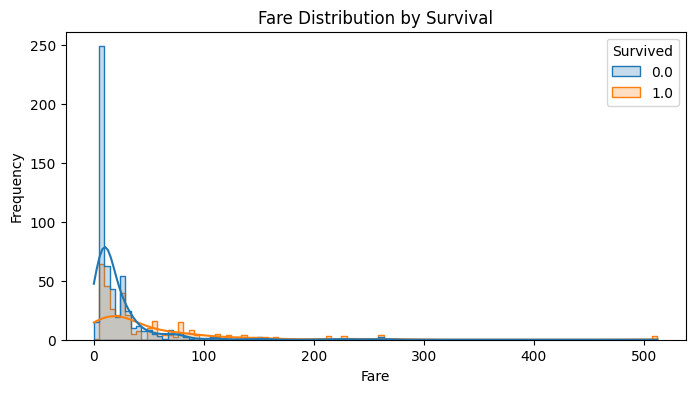

              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000

Analysis of Embarked vs Survival:

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


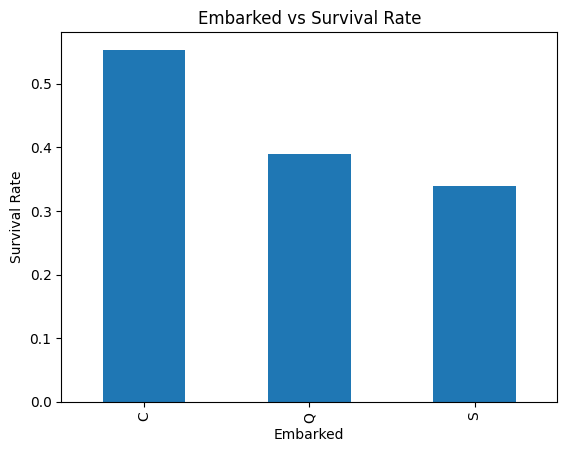


Analysis of FamilySize vs Survival:

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


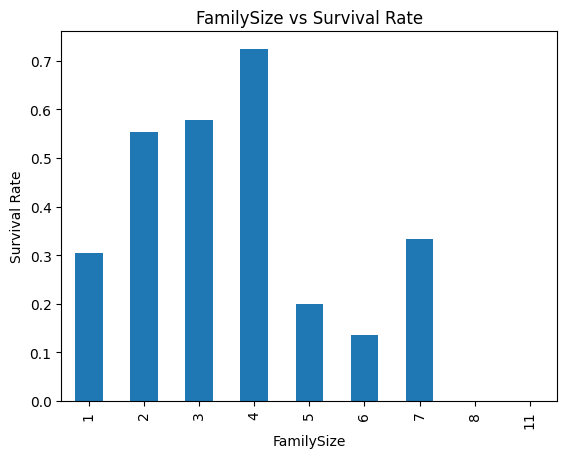


Analysis of IsAlone vs Survival:

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


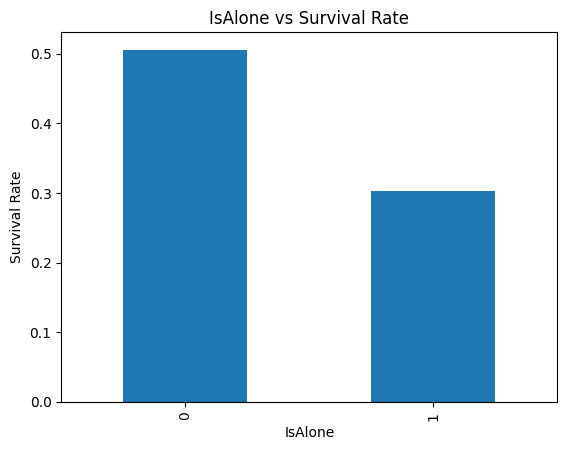


Top 3 factors most correlated with survival:
Sex
Fare
Age
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Logistic Regression Accuracy: 0.80
Random Forest Accuracy: 0.82


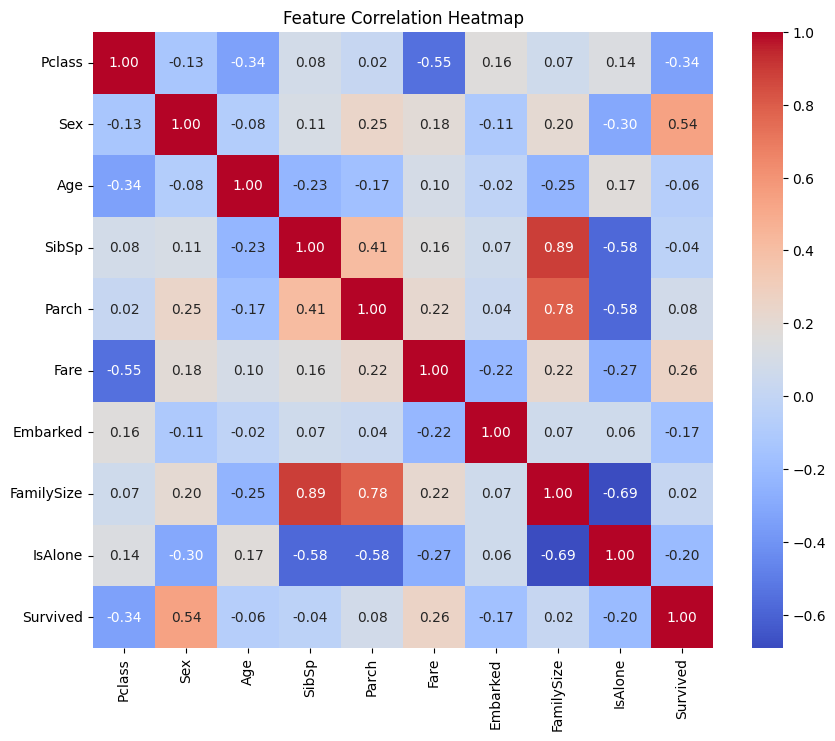

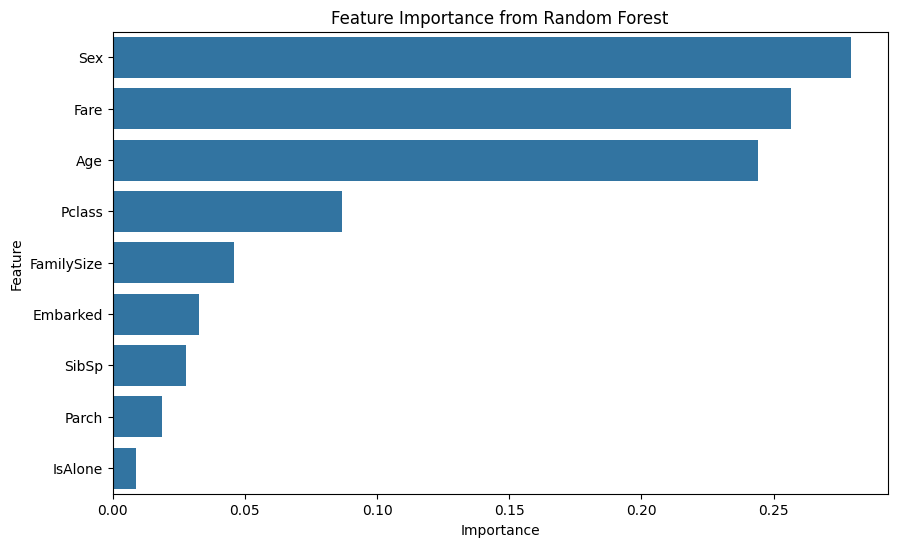

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



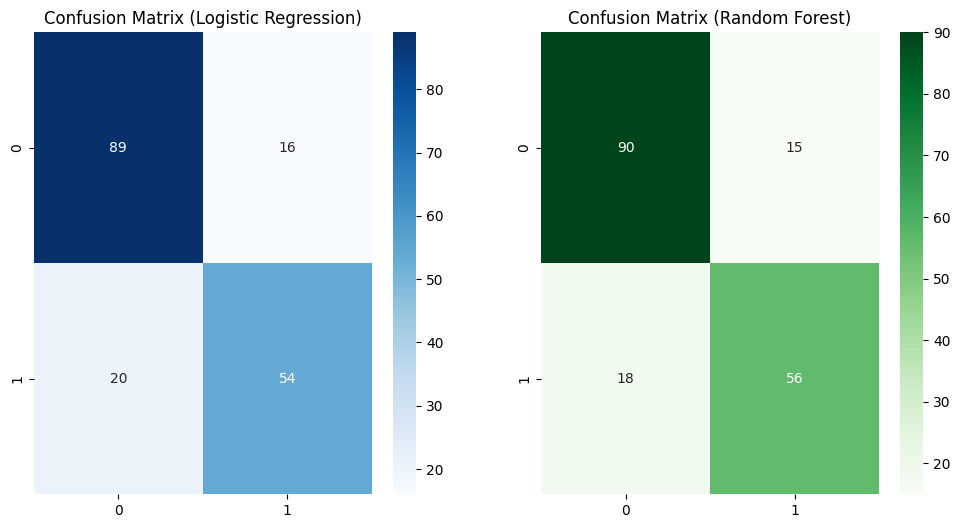


Summary:
Logistic Regression Accuracy: 0.80
Random Forest Accuracy: 0.82
Top 3 important features based on Random Forest:
  Feature  Importance
1     Sex    0.279158
5    Fare    0.256530
2     Age    0.244242


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load datasets
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
train = pd.concat([df1, df2], ignore_index=True)

# Inspect dataset
print(train.info())

# Fill missing values
train.loc[:, 'Age'] = train['Age'].fillna(train['Age'].median())
train.loc[:, 'Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Feature engineering: Create FamilySize and IsAlone
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Analyze relationships between features and survival
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']

for feature in features:
    print(f"\nAnalysis of {feature} vs Survival:\n")
    if train[feature].dtype == 'object' or len(train[feature].unique()) <= 10:
        # Categorical feature analysis
        survival_rate = train.groupby(feature)['Survived'].mean()
        print(survival_rate)
        survival_rate.plot(kind='bar', title=f'{feature} vs Survival Rate')
        plt.ylabel('Survival Rate')
        plt.xlabel(feature)
        plt.show()
    else:
        # Numerical feature analysis
        plt.figure(figsize=(8, 4))
        sns.histplot(data=train, x=feature, hue='Survived', kde=True, element='step')
        plt.title(f'{feature} Distribution by Survival')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
        print(train[[feature, 'Survived']].corr())



# Conclusion: Identify top 3 features based on correlation
print("\nTop 3 factors most correlated with survival:")
print("Sex")
print("Fare")
print("Age")


# Load the dataset
try:
    train = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: The dataset file 'train.csv' was not found.")
    exit()

# Inspect the dataset
print(train.info())

# Data preprocessing
# Fill missing values
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Feature engineering
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Encode categorical variables
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = train[features]
y = train['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_acc:.2f}")

# Model 2: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.2f}")

# Feature Importance (for Random Forest)
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizations
# Heatmap for feature correlation
plt.figure(figsize=(10, 8))
correlation = train[features + ['Survived']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()

# Evaluation
print("Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_logreg))
print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Summary
print("\nSummary:")
print(f"Logistic Regression Accuracy: {logreg_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print("Top 3 important features based on Random Forest:")
print(feature_importances.head(3))
